# Create Frequency Table from Data Column

In [ ]:
import numpy as np


path_to_data_column = "Data_Column.csv"
lowest_lower_class_boundary = -0.5
highest_upper_class_boundary = 30.5
last_place_of_significance = 1
number_of_classes = np.ceil( ( 30.5-(-0.5) ) / last_place_of_significance )

In [ ]:
import pandas as pd


# Generate ordered data_column and related statistics.    
dataframe = pd.read_csv(path_to_data_column, header=None).astype("float")
dataframe.columns = ["Data_Column"]
dataframe = dataframe.sort_values(by=["Data_Column"])
data_column = dataframe["Data_Column"]
data_column_as_list = data_column.to_list()


# Check parameters.
if (not isinstance(lowest_lower_class_boundary, float)):
    assert("lowest_lower_class_boundary must be a floating-point number.")
if (not isinstance(highest_upper_class_boundary, float)):
    assert("highest_upper_class_boundary must be a floating-point number.")
if (not isinstance(number_of_classes, int)):
    assert("number_of_classes must be an integer.")


# Determine lower_class_boundaries and upper_class_boundaries, and make sure no datum is on a boundary.
lower_class_boundaries = []
upper_class_boundaries = []
class_width = np.round((highest_upper_class_boundary - lowest_lower_class_boundary) / float(number_of_classes), 1)
for i in np.arange(0, number_of_classes):
    lower_class_boundaries.append(lowest_lower_class_boundary + float(i)*class_width)
    upper_class_boundaries.append(lowest_lower_class_boundary + float(i+1)*class_width)
for i in data_column_as_list:
    if ((i in lower_class_boundaries) or (i in upper_class_boundaries)):
        assert("A datum lies on a class boundary.")

        
class_midpoints = []
for i in np.arange(0, len(lower_class_boundaries)):
    class_midpoints.append((lower_class_boundaries[i] + upper_class_boundaries[i])/2.0)
        

# Determine frequencies.
frequencies = []
value_counts = data_column.value_counts(sort=False)
index_of_value_counts = value_counts.index
for i in np.arange(0, len(lower_class_boundaries)):
    frequency = 0
    for j in np.arange(0, len(index_of_value_counts)):
        if ((index_of_value_counts[j] > lower_class_boundaries[i]) and
            (index_of_value_counts[j] < upper_class_boundaries[i])):
            frequency = frequency + value_counts[index_of_value_counts[j]]
    frequencies.append(frequency)
    

# Determine cumulative_frequencies.
cumulative_frequencies = []
cumulative_frequency = 0
for i in np.arange(0, len(lower_class_boundaries)):
    cumulative_frequency += frequencies[i]
    cumulative_frequencies.append(cumulative_frequency)
    
    
# Determine number_of_data.
number_of_data = len(data_column_as_list)


# Determine relative_frequencies.
relative_frequencies = []
for i in np.arange(0, len(lower_class_boundaries)):
    relative_frequencies.append(float(frequencies[i]) / float(number_of_data))
    
    
# Determine cumulative_relative_frequencies.
cumulative_relative_frequencies = []
cumulative_relative_frequency = 0
for i in np.arange(0, len(lower_class_boundaries)):
    cumulative_relative_frequency += relative_frequencies[i]
    cumulative_relative_frequencies.append(cumulative_relative_frequency)


# Assemble and output frequency table.
frequency_table = \
    pd.DataFrame( \
        list(zip( \
            lower_class_boundaries, \
            upper_class_boundaries, \
            class_midpoints, \
            frequencies, \
            cumulative_frequencies, \
            relative_frequencies, \
            cumulative_relative_frequencies
        )), \
        columns=[ \
            "LCB", \
            "UCB", \
            "CM", \
            "F", \
            "CF", \
            "RF", \
            "CRF"
        ]
    )
frequency_table

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Print data.
print("Data: " + str(data_column_as_list))


# Determine boxplot landmarks.
lower_index_of_Q1 = int(np.floor(25.0/100.0 * float(number_of_data+1))) - 1
upper_index_of_Q1 = int(np.ceil(25/100 * float(number_of_data+1))) - 1
q1 = (data_column_as_list[lower_index_of_Q1] + data_column_as_list[upper_index_of_Q1]) / 2.0

lower_index_of_Q2 = int(np.floor(50.0/100.0 * float(number_of_data+1))) - 1
upper_index_of_Q2 = int(np.ceil(50/100 * float(number_of_data+1))) - 1
q2 = (data_column_as_list[lower_index_of_Q2] + data_column_as_list[upper_index_of_Q2]) / 2.0

lower_index_of_Q3 = int(np.floor(75.0/100.0 * float(number_of_data+1))) - 1
upper_index_of_Q3 = int(np.ceil(75.0/100.0 * float(number_of_data+1))) - 1
q3 = (data_column_as_list[lower_index_of_Q3] + data_column_as_list[upper_index_of_Q3]) / 2.0

IQR = q3 - q1
lower_fence = q1 - 1.5*IQR
upper_fence = q3 + 1.5*IQR

outliers = []
data_without_outliers = []
for i in np.arange(0, len(data_column_as_list)):
    if ((data_column_as_list[i] >= lower_fence) and (data_column_as_list[i] <= upper_fence)):
        data_without_outliers.append(data_column_as_list[i])
    else:
        outliers.append(data_column_as_list[i])

minimum_without_outliers = min(data_without_outliers)
maximum_without_outliers = max(data_without_outliers)

mean = np.mean(data_column_as_list)

if value_counts.max() == 1:
    modes = "DNE"
else:
    modes = value_counts[value_counts == value_counts.max()]
    
range = data_column.max() - data_column.min()

sample_standard_deviation = np.std(data_column_as_list, ddof=1)
population_standard_deviation = np.std(data_column_as_list, ddof=0)
sample_variance = np.var(data_column_as_list, ddof=1)
population_variance = np.var(data_column_as_list, ddof=0)

skewness = 0
for i in np.arange(0, number_of_data):
    skewness += (data_column_as_list[i] - mean)**3
skewness /= (number_of_data * sample_standard_deviation**3)


print("Q1: " + str(q1))
print("Median: " + str(q2))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))
print("Lower Fence: " + str(lower_fence))
print("Upper Fence: " + str(upper_fence))
print("Outliers: " + str(outliers))
print("Data without Outliers: " + str(data_without_outliers))
print("Min-without-Outliers: " + str(minimum_without_outliers))
print("Max-without-Outliers: " + str(maximum_without_outliers))
print("Mean: " + str(mean))
print("Mode(s) and Count(s):\n" + str(modes))
print("Range: " + str(range))
print("Sample Standard Deviation: " + str(sample_standard_deviation))
print("Population Standard Deviation: " + str(population_standard_deviation))
print("Sample Variance: " + str(sample_variance))
print("Population Variance: " + str(population_variance))
print("Skewness: " + str(skewness))

Data: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 10.0]
Q1: 1.5
Median: 3.5
Q3: 7.0
IQR: 5.5
Lower Fence: -6.75
Upper Fence: 15.25
Outliers: []
Data without Outliers: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 10.0]
Min-without-Outliers: 0.0
Max-without-Outliers: 10.0
Mean: 3.8846153846153846
Mode(s) and Count(s):
0.0    5
7.0    5
Name: Data_Column, dtype: int64
Range: 10.0
Sample Standard Deviation: 2.930213959108421
Population Standard Deviation: 2.8733111839415013
Sample Variance: 8.586153846153845
Population Variance: 8.255917159763312
Skewness: 0.1916149608724692


In [ ]:
percentile = 37
lower_index_of_value = int(np.floor(float(percentile)/100.0 * float(number_of_data+1))) - 1
upper_index_of_value = int(np.ceil(float(percentile)/100.0 * float(number_of_data+1))) - 1
value_of_percentile = (data_column_as_list[lower_index_of_value] + data_column_as_list[upper_index_of_value]) / 2.0
print(f"Value of Percentile {str(percentile)}: " + str(value_of_percentile))

value = 74
number_of_values_less = 0
number_of_repetitions = 0
for i in np.arange(0, number_of_data):
    if (data_column_as_list[i] < value):
        number_of_values_less += 1
    if (data_column_as_list[i] == value):
        number_of_repetitions += 1
percentile_of_value = np.round((float(number_of_values_less) + float(number_of_repetitions)/2) / float(number_of_data) * 100, 0)
print(f"Percentile of {value}: " + str(percentile_of_value))

Value of Percentile 37: 2.0
Percentile of 74: 100.0


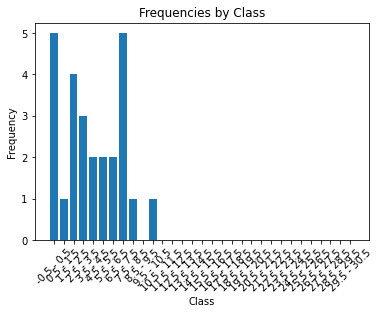

In [ ]:
import matplotlib.pyplot as plt


x_coordinates = []
for i in np.arange(0, len(lower_class_boundaries)):
    x_coordinates.append(
        str("{:.1f}".format(lower_class_boundaries[i])) + \
        " - " + \
        str("{:.1f}".format(upper_class_boundaries[i]))
    )
plt.bar(x_coordinates, frequencies)
plt.title("Frequencies by Class")
plt.ylabel("Frequency")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()

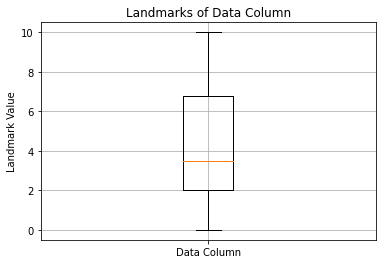

In [ ]:
plt.boxplot(data_column_as_list, labels=["Data Column"])
plt.title("Landmarks of Data Column")
plt.ylabel("Landmark Value")
plt.grid()
plt.show()